<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday_deleteNaN_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [12]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [14]:
rain_data.set_index("날짜", inplace = True)
rain_data = rain_data.dropna(how='all')

print(rain_data)

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
날짜                                                                   
2009-01-16         0.3         2.4         0.6         0.2        NaN
2009-01-18         0.0         0.2         4.9         0.1        NaN
2009-01-22         0.0         0.1         NaN         0.0        NaN
2009-01-24         NaN         0.4         0.2         0.0        NaN
2009-01-25         0.0         0.3         1.5         0.1        0.0
...                ...         ...         ...         ...        ...
2023-12-20         0.4         0.1         0.0         0.0        NaN
2023-12-24         NaN         NaN         NaN         0.0        NaN
2023-12-25         0.9         0.7         0.0         0.2        NaN
2023-12-30         6.8         9.9         2.3         8.5        0.7
2023-12-31         3.1         5.3         6.0         4.9       26.8

[2993 rows x 5 columns]


In [15]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [16]:
rain = []

for i in range(0,len(rain_data)):
  r_data = 0
  for col in rain_col:
    if '211' in col :
      r_data += rain_data[col][i]*0.668
    elif '101' in col:
      r_data += rain_data[col][i] * 0.124
    elif '100' in col:
      r_data += rain_data[col][i] * 0.114
    elif '90' in col:
      r_data += rain_data[col][i] * 0.094
  rain.append(r_data)

print(rain)

rain_data['rain'] = rain

[0.5664, 0.5834000000000001, 0.012400000000000001, 0.0724, 0.2082, 0.0342, 3.0309999999999997, 2.5796, 0.0, 0.3874, 0.0, 0.0, 0.049600000000000005, 1.7386000000000001, 18.901, 0.2166, 0.0352, 0.16760000000000003, 0.0, 1.4314, 0.38360000000000005, 0.6972, 0.0, 0.235, 1.3922, 0.5388000000000001, 3.0470000000000006, 0.2906, 0.4188, 20.564400000000003, 4.901400000000001, 0.0228, 0.405, 12.95, 1.5133999999999999, 0.0352, 10.462, 0.188, 1.2364, 1.6254, 10.534600000000001, 0.16780000000000003, 1.2488, 9.107, 0.532, 0.0342, 33.625, 4.2459999999999996, 0.0, 9.004000000000001, 9.967, 0.339, 0.681, 0.42540000000000006, 1.1478, 0.0, 0.27460000000000007, 21.081000000000003, 8.355, 1.4594000000000003, 17.46, 6.295, 28.601, 0.10400000000000001, 0.787, 0.0, 1.7840000000000003, 47.02100000000001, 53.777, 0.41600000000000004, 0.062, 15.052000000000001, 16.266000000000002, 1.3981999999999999, 3.297, 7.519, 1.3102, 4.613, 2.828, 2.0810000000000004, 15.091000000000001, 0.394, 0.376, 0.265, 3.3394, 0.62, 2.

In [17]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')
dam_flow.set_index("날짜", inplace = True)
print(dam_flow)

            유입량(㎥/s)
날짜                  
2009-01-01     0.000
2009-01-02     0.825
2009-01-03     3.904
2009-01-04     0.000
2009-01-05     0.000
...              ...
2023-12-27    25.873
2023-12-28    21.186
2023-12-29    20.887
2023-12-30    29.183
2023-12-31    25.803

[5478 rows x 1 columns]


In [18]:
date_index = rain_data.index
dam_value = dam_flow.loc[date_index]

print(dam_value)

data = pd.merge(rain_data, dam_value,on='날짜', how='outer')

# data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

            유입량(㎥/s)
날짜                  
2009-01-16     0.000
2009-01-18     0.000
2009-01-22     0.957
2009-01-24     2.003
2009-01-25     7.361
...              ...
2023-12-20    42.639
2023-12-24    24.665
2023-12-25    25.785
2023-12-30    29.183
2023-12-31    25.803

[2993 rows x 1 columns]


In [19]:
print(data)
print(max(data['유입량(㎥/s)']))

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)    rain  \
날짜                                                                              
2009-01-16         0.3         2.4         0.6         0.2        0.0  0.5664   
2009-01-18         0.0         0.2         4.9         0.1        0.0  0.5834   
2009-01-22         0.0         0.1         0.0         0.0        0.0  0.0124   
2009-01-24         0.0         0.4         0.2         0.0        0.0  0.0724   
2009-01-25         0.0         0.3         1.5         0.1        0.0  0.2082   
...                ...         ...         ...         ...        ...     ...   
2023-12-20         0.4         0.1         0.0         0.0        0.0  0.2796   
2023-12-24         0.0         0.0         0.0         0.0        0.0  0.0000   
2023-12-25         0.9         0.7         0.0         0.2        0.0  0.6880   
2023-12-30         6.8         9.9         2.3         8.5        0.7  6.0980   
2023-12-31         3.1      

<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


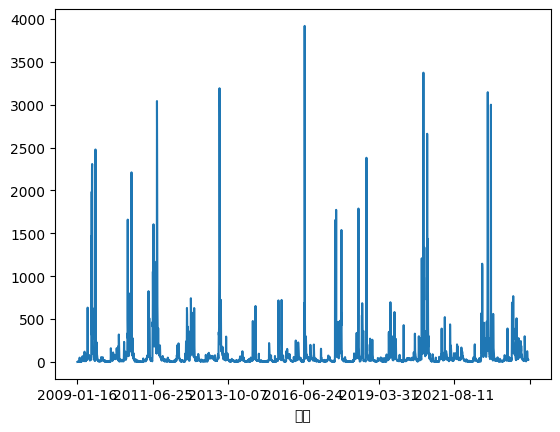

In [20]:
# data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [21]:
data['Y'] = data['유입량(㎥/s)']
data = data.dropna()
data.reset_index(drop=False, inplace = True)

rain_col = [i for i in rain_data.columns if '강수' in i]
data = data.drop(rain_col, axis = 1)

print(data)

              날짜    rain  유입량(㎥/s)       Y
0     2009-01-16  0.5664     0.000   0.000
1     2009-01-18  0.5834     0.000   0.000
2     2009-01-22  0.0124     0.957   0.957
3     2009-01-24  0.0724     2.003   2.003
4     2009-01-25  0.2082     7.361   7.361
...          ...     ...       ...     ...
2988  2023-12-20  0.2796    42.639  42.639
2989  2023-12-24  0.0000    24.665  24.665
2990  2023-12-25  0.6880    25.785  25.785
2991  2023-12-30  6.0980    29.183  29.183
2992  2023-12-31  5.9312    25.803  25.803

[2993 rows x 4 columns]


In [22]:
train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")
train.set_index("날짜", inplace = True)
valid.set_index("날짜", inplace = True)
test.set_index("날짜", inplace = True)

trainX, trainY = train.drop(['Y'], axis = 1), train['Y']
validX, validY = valid.drop(['Y'], axis = 1), valid['Y']
testX, testY = test.drop(['Y'], axis = 1), test['Y']

train set :  1812 
 valid set :  988 
 test set :  193 



In [23]:
print(trainX)
len(trainX.columns)

               rain  유입량(㎥/s)
날짜                           
2009-01-16   0.5664     0.000
2009-01-18   0.5834     0.000
2009-01-22   0.0124     0.957
2009-01-24   0.0724     2.003
2009-01-25   0.2082     7.361
...             ...       ...
2017-12-20   0.1364     0.000
2017-12-23   0.0000     5.522
2017-12-24  10.7130    11.366
2017-12-30   0.4254     6.000
2017-12-31   0.8044     0.285

[1812 rows x 2 columns]


2

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(LSTM(64, input_shape=(2,1)))
model2.add(Dense(40, 'relu'))
model2.add(Dense(40, 'relu'))
model2.add(Dense(8, 'relu'))
model2.add(Dense(8))
model2.add(Dense(1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 40)                2600      
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 8)                 328       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [50]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model2.fit(trainX, trainY, validation_data = (validX, validY), batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
182/182 [==============================] - 11s 40ms/step - loss: 644.3339 - root_mean_squared_error: 25.3837 - val_loss: 297.7795 - val_root_mean_squared_error: 17.2563
Epoch 2/50
182/182 [==============================] - 6s 34ms/step - loss: 1000.7147 - root_mean_squared_error: 31.6341 - val_loss: 224.0795 - val_root_mean_squared_error: 14.9693
Epoch 3/50
182/182 [==============================] - 1s 5ms/step - loss: 262.8460 - root_mean_squared_error: 16.2125 - val_loss: 234.2155 - val_root_mean_squared_error: 15.3041
Epoch 4/50
182/182 [==============================] - 1s 6ms/step - loss: 828.7144 - root_mean_squared_error: 28.7874 - val_loss: 1122.5579 - val_root_mean_squared_error: 33.5046
Epoch 5/50
182/182 [==============================] - 5s 28ms/step - loss: 867.3268 - root_mean_squared_error: 29.4504 - val_loss: 177.5969 - val_root_mean_squared_error: 13.3265
Epoch 6/50
182/182 [==============================] - 1s 6ms/step - loss: 418.7264 - root_mean_squared_e

In [51]:
train_score = model2.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

7/7 [==============================] - 0s 4ms/step - loss: 9.5715 - root_mean_squared_error: 3.0938
Train Score: 9.57 MSE (3.09 RMSE)


In [52]:
train_predictions = model2.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

57/57 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
날짜,,
2009-01-16,0.331491,0.000
2009-01-18,0.321996,0.000
2009-01-22,1.398840,0.957
2009-01-24,2.466845,2.003
2009-01-25,7.853483,7.361
...,...,...
2017-12-20,0.620784,0.000
2017-12-23,6.043926,5.522
2017-12-24,12.573380,11.366


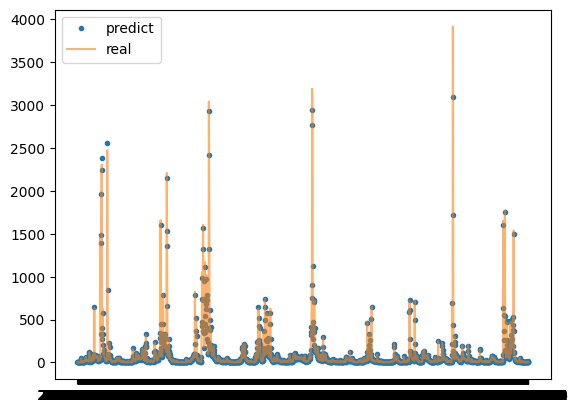

In [53]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:],'.')
plt.plot(train_results['Actuals'][:], alpha = 0.6)
plt.legend(['predict', 'real'])

In [54]:
val_predictions = model2.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

31/31 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
날짜,,
2018-01-08,0.207269,0.000
2018-01-09,4.062420,3.462
2018-01-15,5.510729,4.869
2018-01-17,0.580920,0.000
2018-01-20,0.707093,0.003
...,...,...
2022-12-24,7.688633,7.574
2022-12-28,10.707413,10.891
2022-12-29,9.060209,9.218


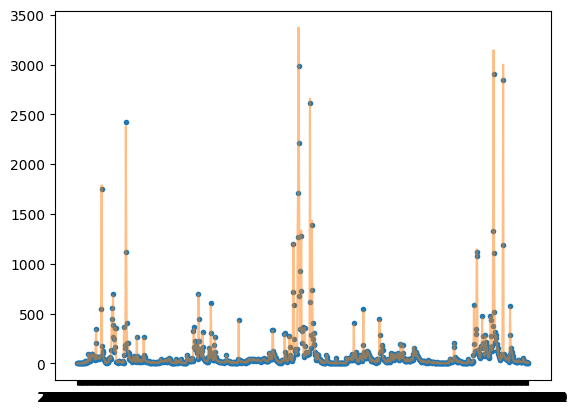

In [55]:
plt.plot(val_results['Val Predictions'][:],'.')
plt.plot(val_results['Actuals'][:], alpha = 0.5)


In [56]:
test_predictions = model2.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

7/7 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
날짜,,
2023-01-06,7.548027,7.096
2023-01-07,3.765560,3.040
2023-01-08,6.583189,6.152
2023-01-13,32.142620,31.789
2023-01-14,35.982426,36.020
...,...,...
2023-12-20,42.810482,42.639
2023-12-24,24.451838,24.665
2023-12-25,26.587875,25.785


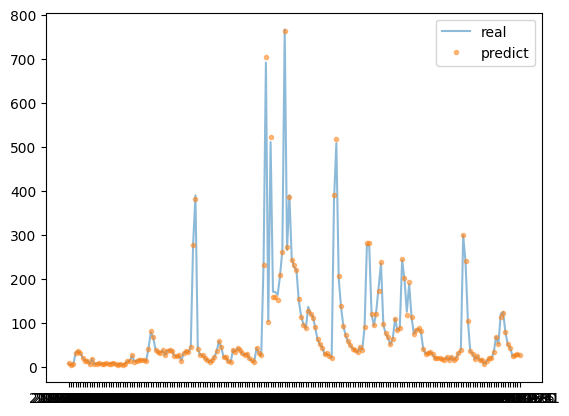

In [57]:
plt.plot(test_results['Actuals'][:], alpha = 0.5)
plt.plot(test_results['Test Predictions'][:],'.', alpha = 0.5)
plt.legend(['real', 'predict'])

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.999240
RMSE : 3.09


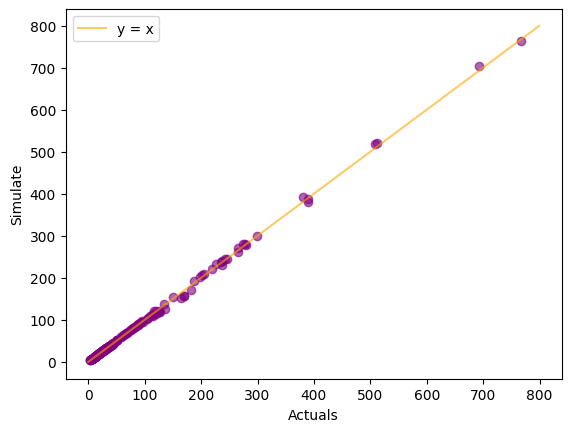

In [59]:
x = np.arange(0,800)
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'orange', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [60]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(test_results['Actuals'][:])
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1**2
  num2 = test_results['Actuals'][i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.999240


In [61]:
# PBIAS
num_sum1 = 0
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(test_results['Actuals'][:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : -0.261262


In [62]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(test_results['Actuals'][:])
pred_avg = mean(test_results['Test Predictions'][:])
for i in range(len(test_results)):
  num1 = (test_results['Actuals'][i] - act_avg) * (test_results['Test Predictions'][i] - pred_avg)
  num_sum1 += num1
  num2 = test_results['Actuals'][i] - pred_avg
  num_sum2 += num2**2
  num3 = test_results['Test Predictions'][i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.999262
